In [1]:
import os
import torch
import sys
import numpy as np
import math
import pandas as pd
from collections import defaultdict
sys.path.append(os.path.abspath(".."))
os.chdir('/path/to/concept_inversion/Experiments')

import pandas as pd
import pandas.core.indexes.base

# Define shim for Int64Index
class Int64Index(pd.Index):
    pass

# Patch the module to include Int64Index
pandas.core.indexes.base.Int64Index = Int64Index

# Redirect old module path to the patched one
sys.modules['pandas.core.indexes.numeric'] = pandas.core.indexes.base

import importlib
import utils.plot_utils
importlib.reload(utils.plot_utils)
# import utils.quant_concept_evals_utils
# import utils.filter_datasets_utils
# importlib.reload(utils.quant_concept_evals_utils)
# importlib.reload(utils.filter_datasets_utils)

# from utils.quant_concept_evals_utils import compute_concept_metrics
# from utils.general_utils import get_split_df
# from utils.filter_datasets_utils import filter_concept_dict

<module 'utils.plot_utils' from '/path/to/concept_inversion/Experiments/utils/plot_utils.py'>

# Detection Plots

## Show Pred Counts

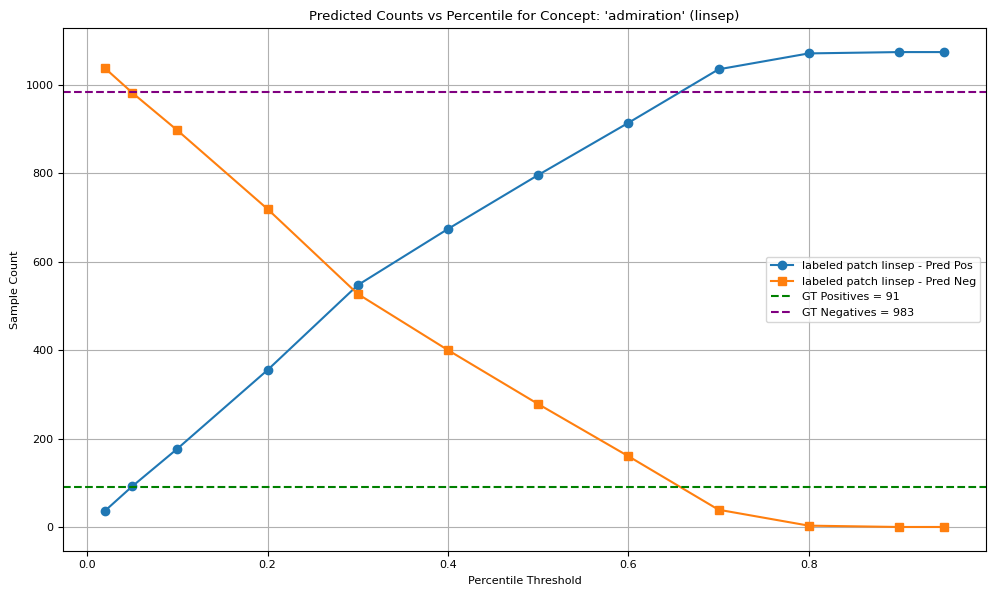

In [43]:
from utils.plot_utils import plot_predictions_vs_percentiles
plot_predictions_vs_percentiles(dataset_name='GoEmotions', 
                                model_name='Llama', 
                                sample_type='patch', 
                                scheme = 'linsep',
                                concept='admiration', 
                                split='test')

## Overall Detections

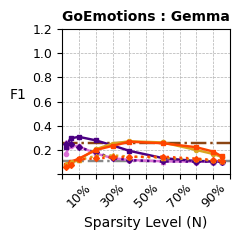

In [48]:
import utils.plot_utils 
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_detection_scores

dataset_name = 'GoEmotions'
model_name = 'Gemma'
plot_detection_scores(dataset_name=dataset_name, 
                      split='test', 
                      model_name=model_name, 
                      sample_types=['patch', 'cls'],
                      concept_types=['avg', 'linsep', 'kmeans', 'linsep kmeans'],
                      metric='f1',
                      ylim = (0, 1.1),
                      figsize=(2.5,2.5),
                      baseline_types = ['prompt', 'random'],
                      percentthrumodel=100,
                      legend_font=9,
                      label_font_size=10,
                      xlabel='Sparsity Level (N)',
                      title=f"{dataset_name} : {model_name}",
                      legend_on_plot=False)

/path/to/concept_inversion/Experiments/utils/plot_utils.py:10743: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  loc='center',
/path/to/concept_inversion/Experiments/utils/plot_utils.py:10743: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  loc='center',
/path/to/concept_inversion/Experiments/utils/plot_utils.py:10743: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  loc='center',
/path/to/concept_inversion/Experiments/utils/plot_utils.py:10743: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  loc='center',


Saved figure to: ../Figs/Paper_Figs/CLIP_multi_dataset_detection.pdf
Saved legend to: ../Figs/Paper_Figs/CLIP_multi_dataset_detection_legend.pdf


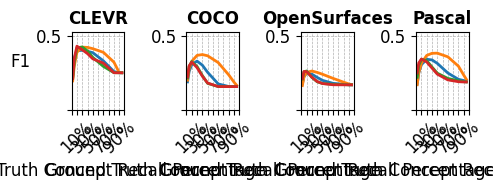

In [4]:
import utils.plot_utils 
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_detection_scores_multi_dataset

# Plot multiple vision datasets for CLIP
datasets = ['CLEVR', 'Coco', 'Broden-OpenSurfaces', 'Broden-Pascal']
plot_detection_scores_multi_dataset(
  model_name='CLIP',
  datasets=datasets,
  titles=['CLEVR',
           'COCO',
           'OpenSurfaces',
           'Pascal'],
  concept_types = ['avg', 'linsep', 'kmeans', 'linsep kmeans'],
  percentthrumodel=100,
  figsize=(5, 2),
  save_filename='../Figs/Paper_Figs/CLIP_multi_dataset_detection.pdf'
)

## Detection Per Concept

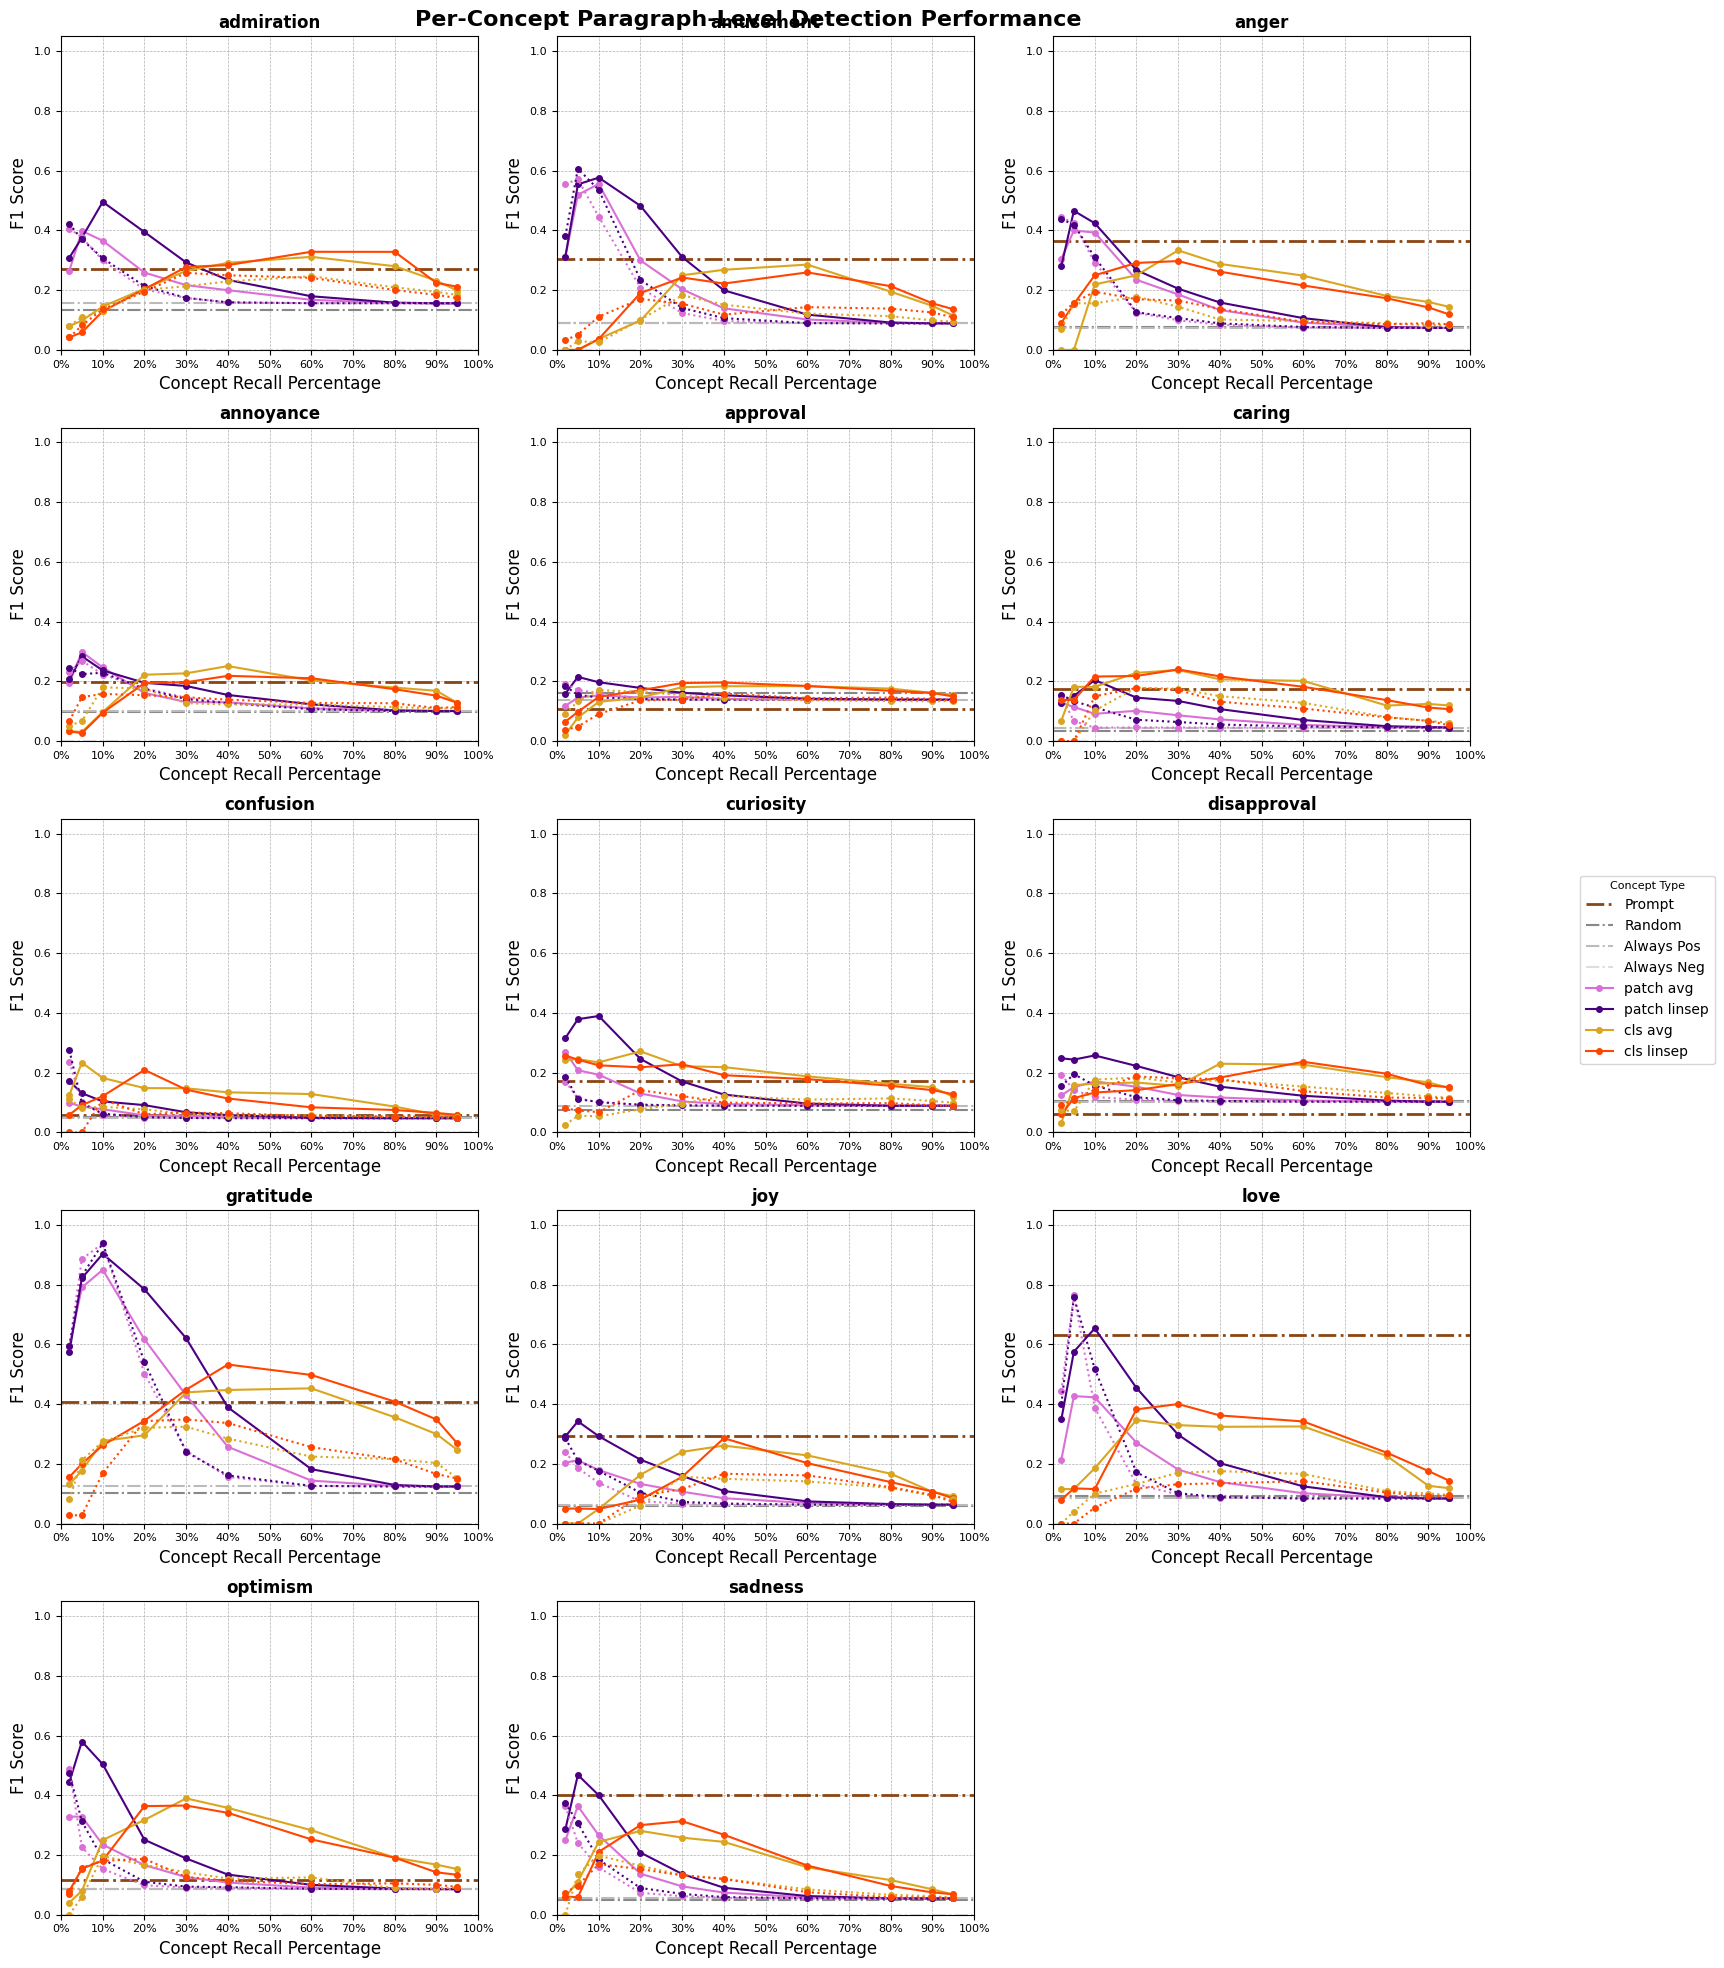

In [73]:
from utils.plot_utils import plot_detection_scores_per_concept
plot_detection_scores_per_concept(dataset_name='GoEmotions', 
                                  split='test', 
                                  model_name='Qwen', 
                                  sample_types=['patch', 'cls','sae'], 
                                  metric='f1', 
                                  concepts_to_plot=None, 
                                  plot_type='both',
                                  n_cols=3)

## Detection Table Overall Averaged Across Percentiles

In [36]:
from utils.plot_utils import summarize_best_detection_scores
summarize_best_detection_scores(dataset_name='Coco',
                                     split='test', 
                                     model_name='CLIP', 
                                     concept_types=['avg', 'linsep', 'kmeans', 'linsep kmeans', 'sae'],
                                     sample_types=['patch', 'cls'],
                                     metric='f1', 
                                     percentthrumodel=81,
                                     weighted_avg=True,
                                     show_baselines=True)

TypeError: summarize_best_detection_scores() got an unexpected keyword argument 'show_baselines'

## Detection Table Per Concept

In [129]:
from utils.plot_utils import summarize_best_detection_scores_per_concept
summarize_best_detection_scores_per_concept(dataset_name = 'Broden-OpenSurfaces', 
                                            split='test', 
                                            model_name = 'Llama', 
                                            sample_types = ['patch'], 
                                            concept_types=['linsep'],
                                            metric='f1')

,concept,method,best_f1,percentile
0,material::brick,labeled patch linsep,0.5899,0.05
1,material::cardboard,labeled patch linsep,0.4894,0.02
2,material::carpet,labeled patch linsep,0.5405,0.05
3,material::ceramic,labeled patch linsep,0.4293,0.05
4,material::concrete,labeled patch linsep,0.6207,0.10
5,material::fabric,labeled patch linsep,0.6531,0.10
6,material::food,labeled patch linsep,0.6329,0.10
7,material::fur,labeled patch linsep,0.5063,0.02
8,material::glass,labeled patch linsep,0.4871,0.02
9,material::granite,labeled patch linsep,0.3056,0.02


## Detection Table Best Possible for Each Concept

In [1]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import summarize_best_detection_scores_using_per_concept_percentiles
summarize_best_detection_scores_using_per_concept_percentiles(
                                     dataset_name='iSarcasm',
                                     split='test', 
                                     model_names=['Llama', 'Gemma', 'Qwen'], 
                                     concept_types=['linsep', 'avg', 'kmeans', 'linsep kmeans'],
                                     sample_types=['patch', 'cls'],
                                     percentthrumodel=100,
                                     metric='f1', 
                                     weighted_avg=True,
                                     baselines=['prompt', 'maxtoken', 'meantoken', 'avgtoken', 'lasttoken', 'randomtoken'],
                                     sorted=True)

ModuleNotFoundError: No module named 'utils'

In [19]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import summarize_best_detection_scores_using_per_concept_percentiles
summarize_best_detection_scores_using_per_concept_percentiles(
                                     dataset_name='iSarcasm',
                                     split='test', 
                                     model_names=['Gemma'], 
                                     concept_types=['sae'],
                                     sample_types=['patch', 'cls'],
                                     percentthrumodel=81,
                                     metric='f1', 
                                     weighted_avg=True,
                                     baselines=['maxtoken', 'meantoken', 'avgtoken', 'lasttoken', 'randomtoken'],
                                     sorted=True)

LaTeX table saved to: ../Figs/Paper_Tables/iSarcasm_Gemma_detection_scores_f1_ptm81.tex


,Model,Sample Type,Concept Method,Detection Method,Best F1
0,Gemma,Token,SAE,SuperTokens,0.777 ± 0.054
1,Gemma,Token,SAE,MaxToken,0.728 ± 0.049
2,Gemma,CLS,SAE,CLS,0.706 ± 0.069
3,Gemma,Token,SAE,MeanToken,0.703 ± 0.051
4,Gemma,Token,SAE,LastToken,0.676 ± 0.044
5,Gemma,Token,SAE,RandomToken,0.676 ± 0.044


In [82]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import summarize_best_detection_scores_using_per_concept_percentiles
summarize_best_detection_scores_using_per_concept_percentiles(
                                     dataset_name='iSarcasm',
                                     split='test', 
                                     model_names=['Llama'], 
                                     concept_types=['avg'],
                                     sample_types=['patch', 'cls'],
                                     percentthrumodel=100,
                                     metric='f1', 
                                     weighted_avg=True,
                                     baselines=['prompt', 'maxtoken', 'meantoken', 'avgtoken', 'lasttoken', 'randomtoken'],
                                     sorted=True)

LaTeX table saved to: ../Figs/Paper_Tables/iSarcasm_Llama_detection_scores_f1_ptm100.tex


,Model,Sample Type,Concept Method,Detection Method,Best F1
0,Llama,CLS,Average,CLS,0.867 ± 0.038
1,Llama,Token,Average,LastToken,0.841 ± 0.038
2,Llama,Token,Average,SuperTokens,0.818 ± 0.043
3,Llama,Token,Average,MaxToken,0.816 ± 0.039
4,Llama,N/A,N/A,Prompt,0.789 ± 0.047
5,Llama,Token,Average,MeanToken,0.714 ± 0.047
6,Llama,Token,Average,RandomToken,0.659 ± 0.046


## Detection for Best Layer for Each Concept

In [76]:
# import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import summarize_best_detection_scores_finding_optimal_percentthrumodel_per_concept
summarize_best_detection_scores_finding_optimal_percentthrumodel_per_concept(
                                     dataset_name='Coco',
                                     model_names=['Llama', 'CLIP'], 
                                     concept_types=['avg', 'linsep', 'kmeans', 'linsep kmeans'],
                                     sample_types=['patch', 'cls'],
                                     metric='f1', 
                                     weighted_avg=True,
                                     baselines=['prompt', 'meantoken', 'avgtoken', 'lasttoken', 'randomtoken'],
                                     sorted=True,
                                     save_table=True)



Table saved to: ../Figs/Paper_Tables/Coco_Llama_CLIP_patch_cls_avg_linsep_kmeans_linsep kmeans_ptm_per_concept_f1_weighted_with_errors_with_prompt+meantoken+lasttoken+randomtoken_baselines.csv


,Model,Sample Type,Concept Type,Detection Method,Best F1
1,Llama,patch,Linsep,SuperTok,0.829 ± 0.010
21,CLIP,patch,Linsep,SuperTok,0.787 ± 0.011
2,Llama,patch,Kmeans,SuperTok,0.747 ± 0.011
0,Llama,patch,Avg,SuperTok,0.746 ± 0.012
20,CLIP,patch,Avg,SuperTok,0.721 ± 0.012
3,Llama,patch,LinsepKmeans,SuperTok,0.716 ± 0.011
33,CLIP,patch,Linsep,RandTok,0.706 ± 0.011
13,Llama,patch,Linsep,RandTok,0.706 ± 0.011
37,CLIP,cls,Linsep,CLS,0.702 ± 0.011
23,CLIP,patch,LinsepKmeans,SuperTok,0.696 ± 0.012


Loaded 6 concepts for CLIP avg supertok
Loaded 6 concepts for CLIP avg cls
Loaded 6 concepts for CLIP avg meantoken
Loaded 6 concepts for CLIP avg lasttoken
Loaded 6 concepts for CLIP linsep supertok
Loaded 6 concepts for CLIP linsep cls
Loaded 6 concepts for CLIP linsep meantoken
Loaded 6 concepts for CLIP linsep lasttoken
Loaded 6 concepts for Llama avg supertok
Loaded 6 concepts for Llama avg cls
Loaded 6 concepts for Llama avg meantoken
Loaded 6 concepts for Llama avg lasttoken
Loaded 6 concepts for Llama linsep supertok
Loaded 6 concepts for Llama linsep cls
Loaded 6 concepts for Llama linsep meantoken
Loaded 6 concepts for Llama linsep lasttoken
Figure saved to: ../Figs/Paper_Figs/ptm_distribution_CLEVR_CLIP_Llama_supertok_cls_meantoken_lasttoken.pdf


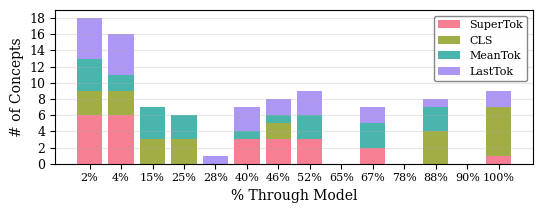

In [178]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_optimal_ptm_distribution
fig = plot_optimal_ptm_distribution(
  dataset_names='CLEVR',
  model_names=['CLIP', 'Llama'],
  concept_types=['avg', 'linsep'],
  detection_methods=['supertok', 'cls', 'meantoken', 'lasttoken'],
  figsize=(5.5, 2.2),
  legend_pos='right',
  text_size=10,
  legend_size=8,
  save_fig=True
)

## Detection Across Layers

Creating detection score plots for 9 percentthrumodel values: [2, 15, 28, 40, 52, 65, 78, 90, 100]


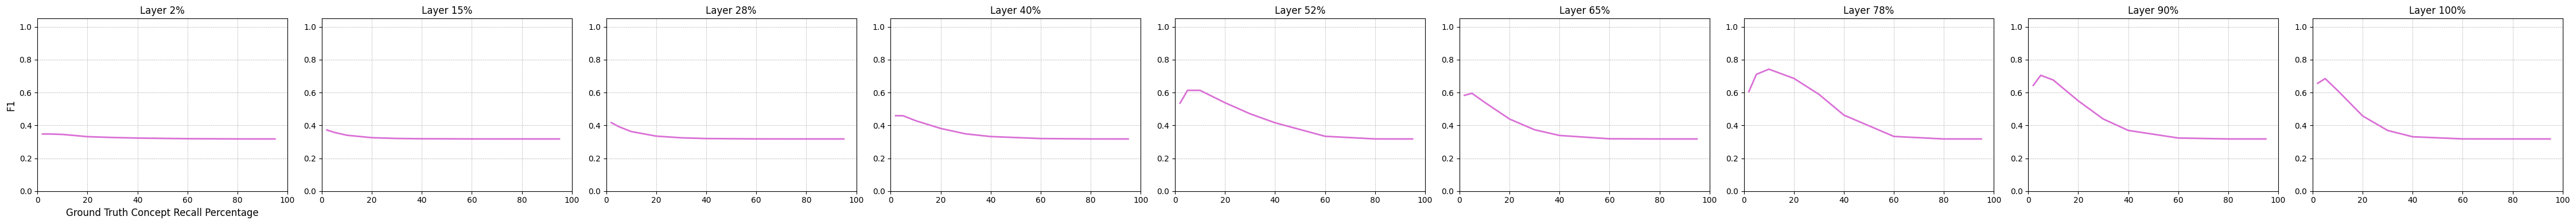

<Figure size 400x600 with 0 Axes>

In [63]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_detection_scores_multiple_percentthru
results = plot_detection_scores_multiple_percentthru(
      dataset_name='Coco',
      split='test',
      model_name='Llama',
      sample_types=['patch'],
      plot_type='supervised',
      concept_types=['avg'],
      save_dir=None
  )

### Weighted Average

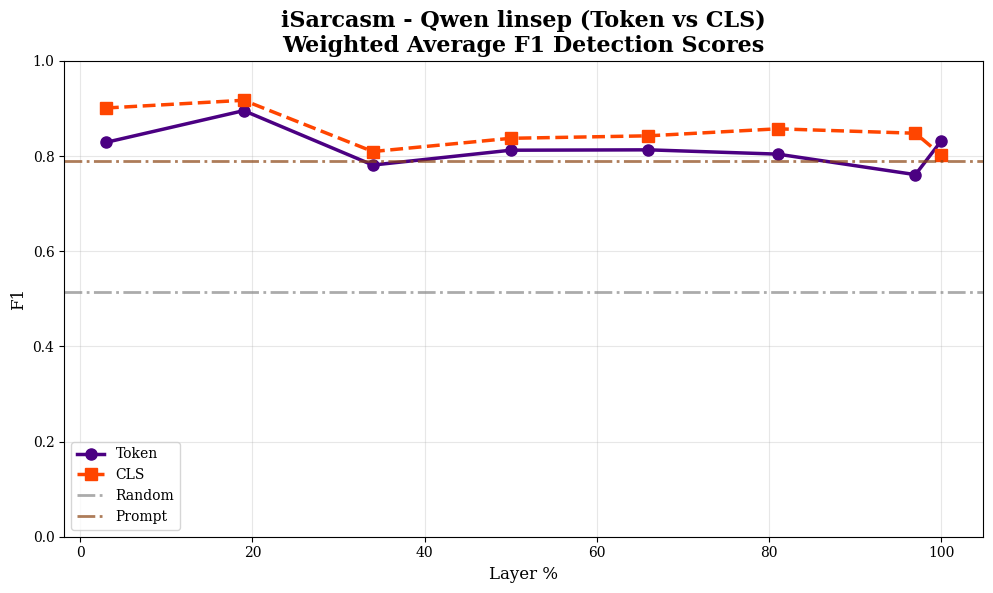

In [121]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_average_detection_scores

plot_average_detection_scores(
      dataset_name='iSarcasm',
      split='test',
      model_name='Qwen',
      sample_type='patch',
      concept_type='linsep',
      metric='f1'
  )

Saved figure to: ../Figs/Paper_Figs/image_detection_across_layers.pdf


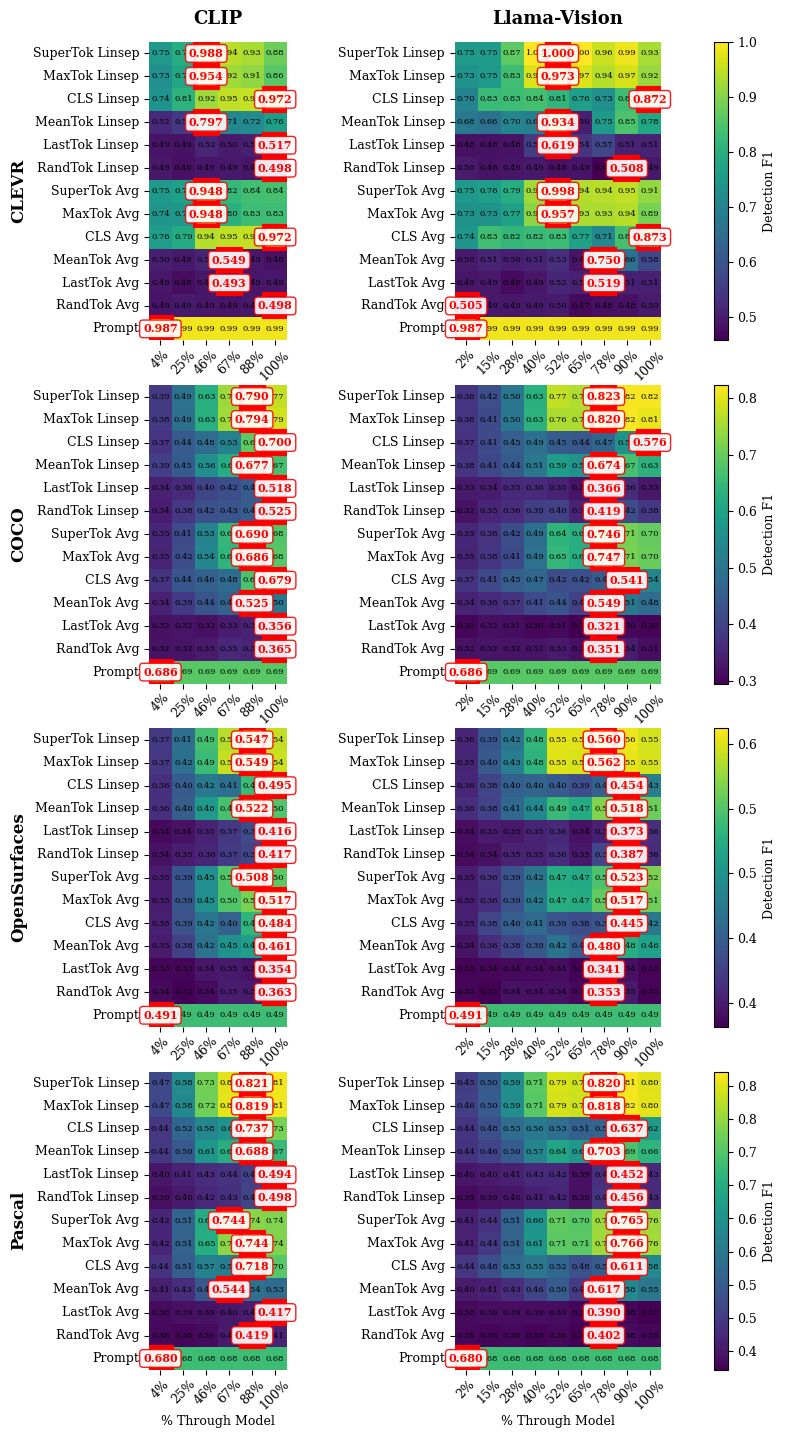

In [15]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_average_detection_scores_heatmap

plot_average_detection_scores_heatmap(
  dataset_names=['CLEVR', 'Coco', 'Broden-OpenSurfaces', 'Broden-Pascal'],
  split='test',
  model_names=['CLIP', 'Llama'],
  sample_types=['patch', 'cls'],
  concept_types=['linsep', 'avg'],
  metric='f1',
  number_size=6,
  model_size=13,
  dataset_size=12,
  font_size=9,
  figsize=(7, 16),
  baseline_types = ['maxtoken', 'meantoken', 'lasttoken', 'randomtoken', 'prompt'],
  show_baselines=True,
  save_file='../Figs/Paper_Figs/image_detection_across_layers.pdf',
  highlight_max_per_row=True
)

Saved figure to: ../Figs/Paper_Figs/text_detection_across_layers.pdf


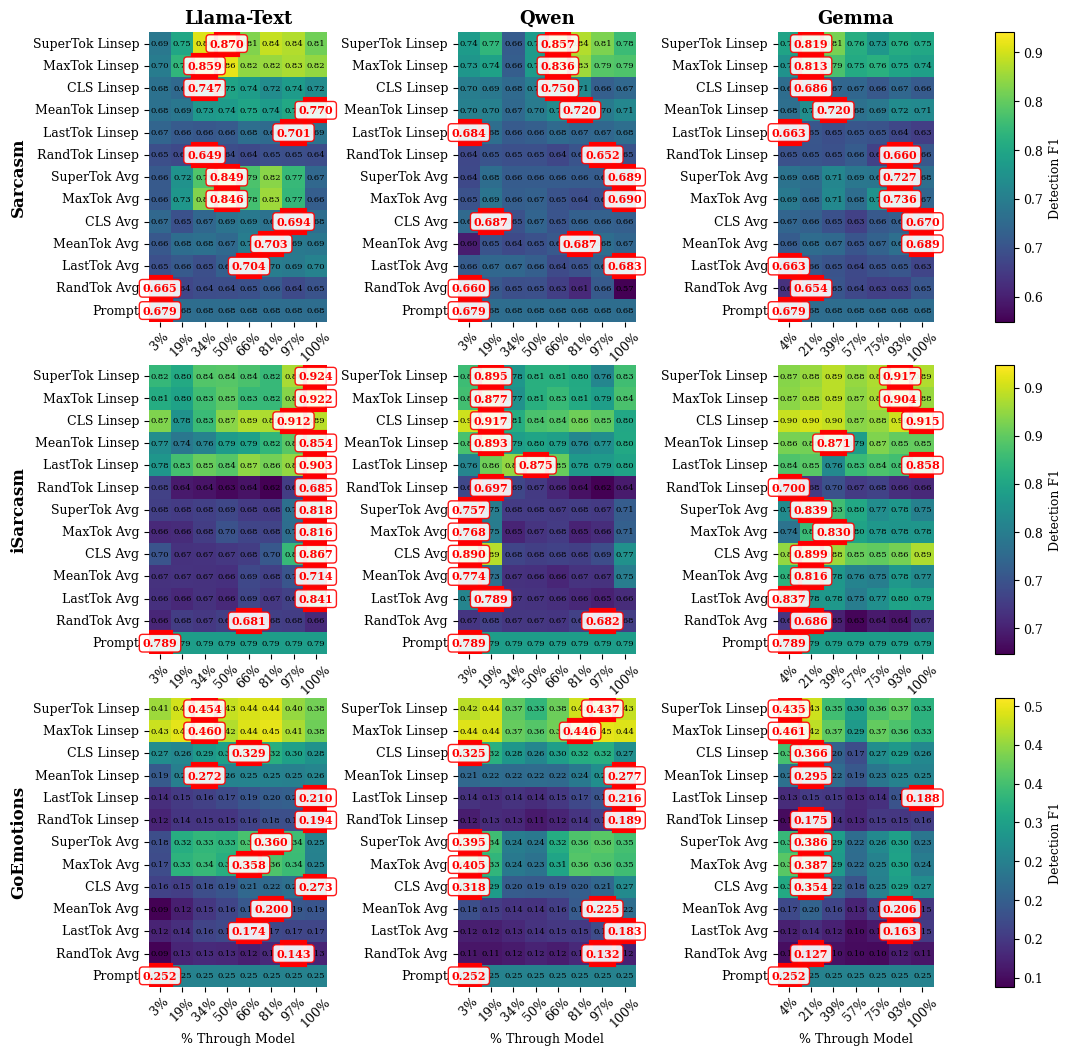

In [17]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_average_detection_scores_heatmap

plot_average_detection_scores_heatmap(
  dataset_names=['Sarcasm', 'iSarcasm', 'GoEmotions'],
  split='test',
  model_names=['Llama', 'Qwen', 'Gemma'],
  sample_types=['patch', 'cls'],
  concept_types=['linsep', 'avg'],
  metric='f1',
  number_size=6,
  model_size=13,
  dataset_size=12,
  font_size=9,
  figsize=(10.5, 11.5),
  baseline_types = ['maxtoken', 'meantoken', 'lasttoken', 'randomtoken', 'prompt'],
  show_baselines=True,
  save_file='../Figs/Paper_Figs/text_detection_across_layers.pdf',
  highlight_max_per_row=True
)

### Per Concept

Plotting all 29 available concepts


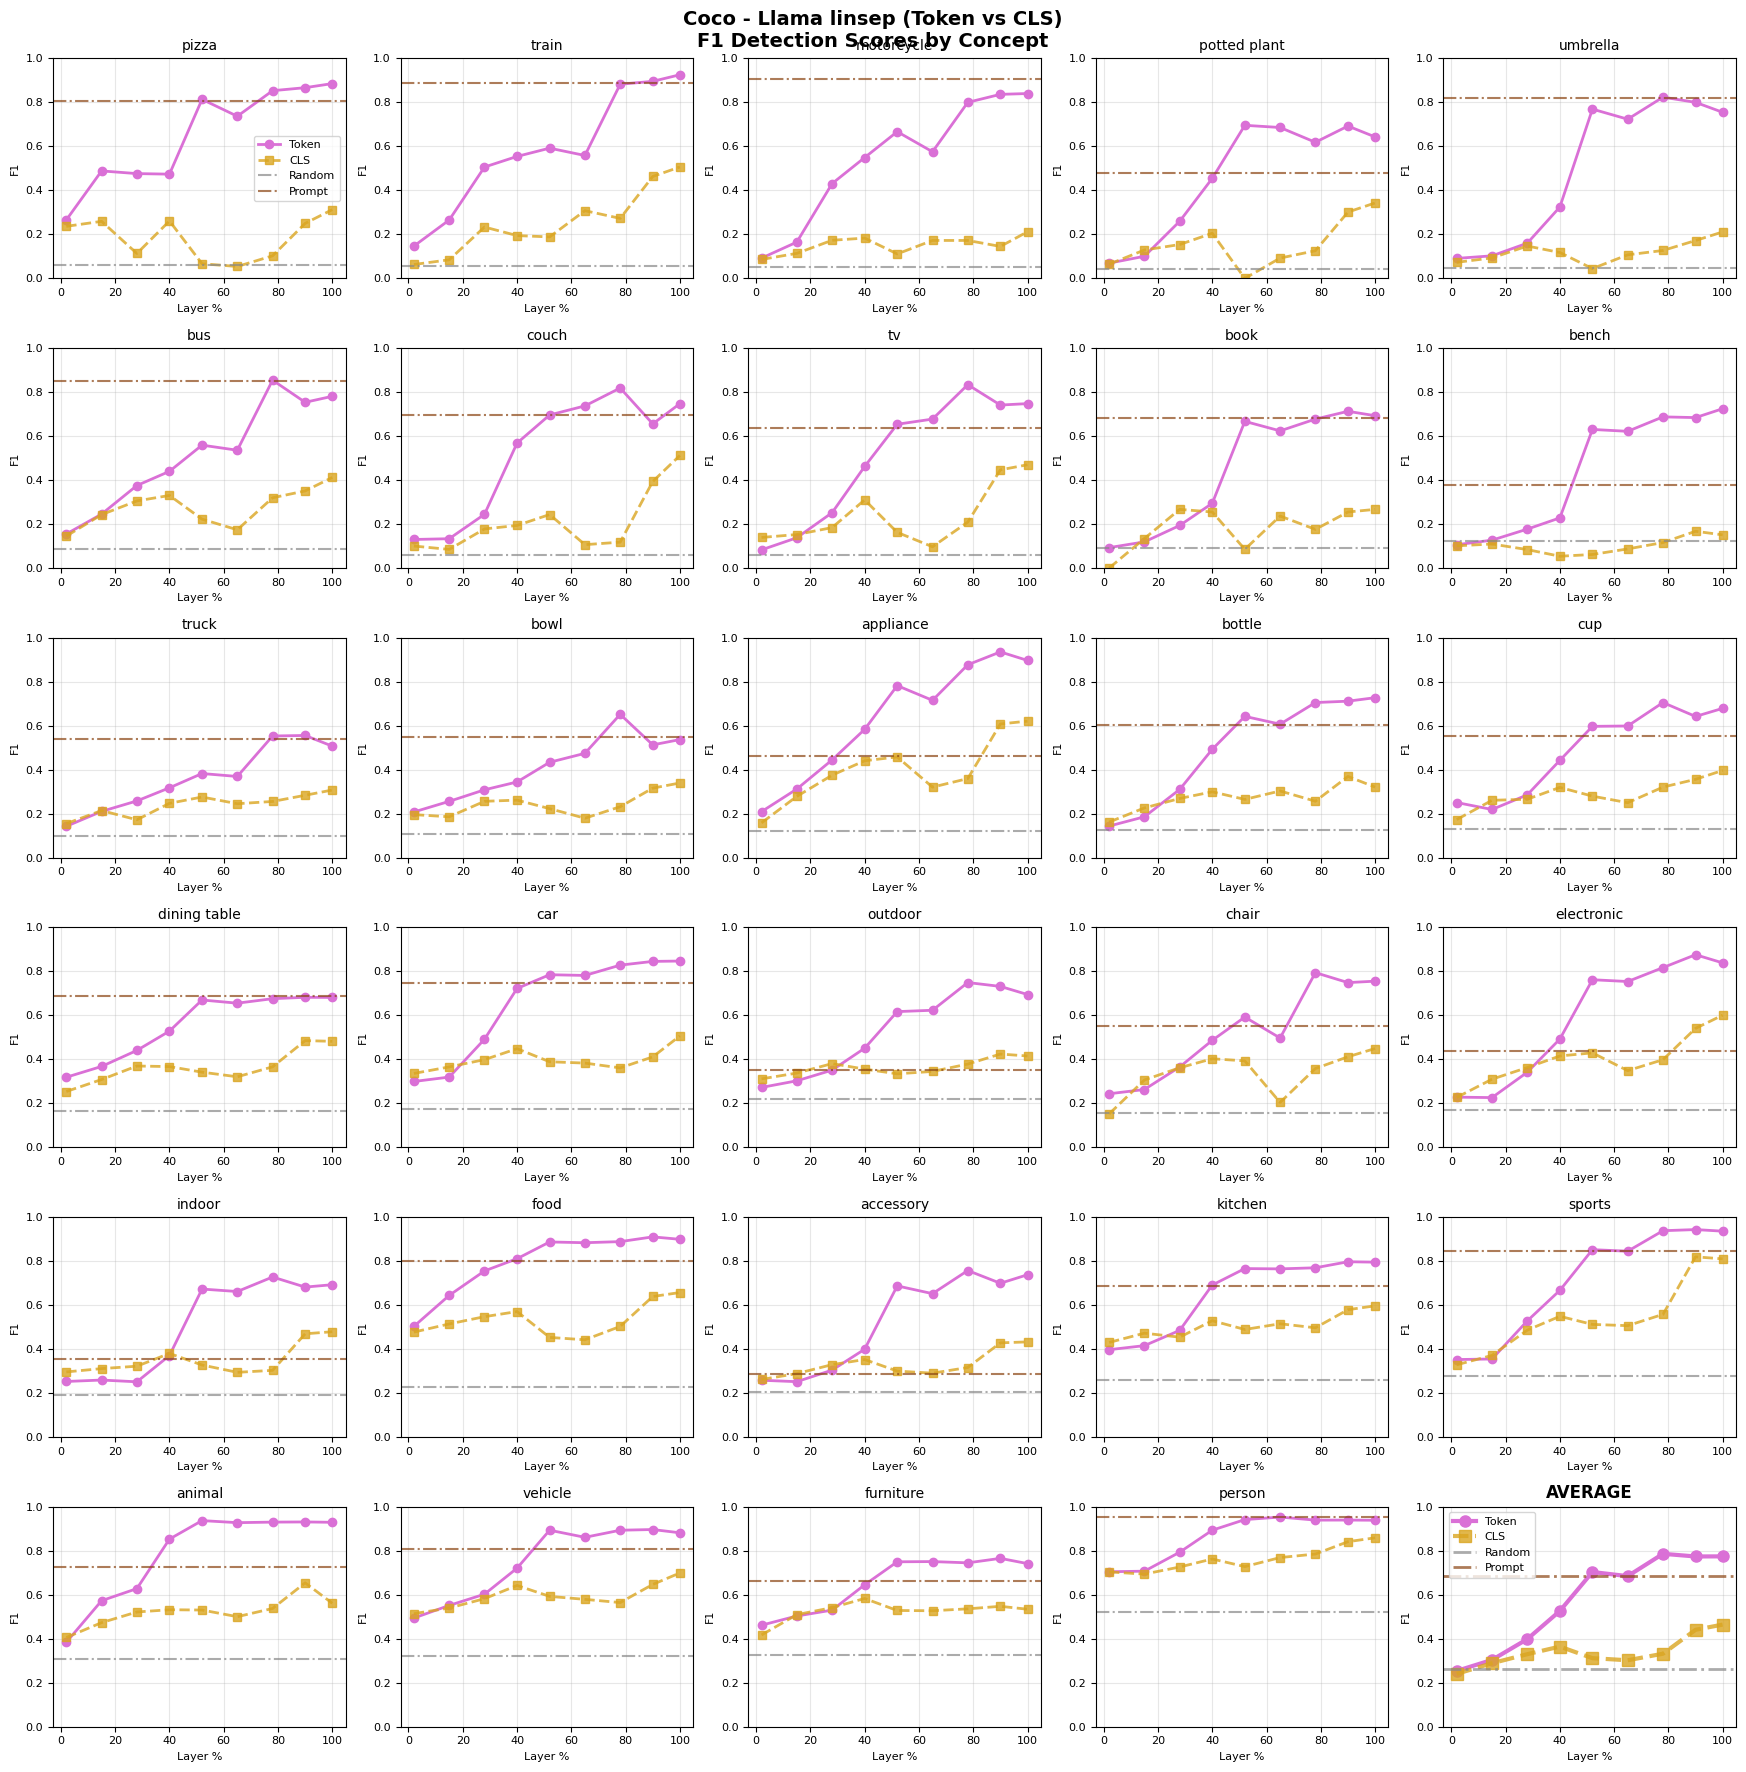

In [8]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_detection_scores_per_concept_lines
plot_detection_scores_per_concept_lines(
      dataset_name='Coco',
      concepts_to_plot=None,
      split='test',
      model_name='Llama',
      sample_type='patch',
      concept_type='linsep'
  )


## Paper Plots

Figure saved to: ../Figs/Paper_Figs/Coco_Llama_cls_patch_linsep_f1_vertical_bar.pdf


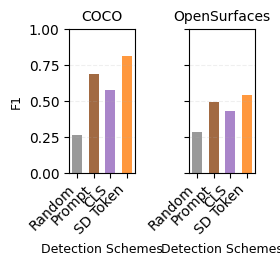

In [58]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_f1_scores_horizontal_bar

# Plot F1 scores for CLIP model on CLEVR dataset
res = plot_f1_scores_horizontal_bar(
      dataset_names=['Coco', 'Broden-OpenSurfaces'],
      split='test',
      model_names=['Llama'],
      sample_types=['cls', 'patch'],
      concept_types=['linsep'],
      figsize=(2.75, 3),  # Custom figure size
      show_baselines=True,
      label_font_size=9,
      title_font_size=10
)

Figure saved to ../Figs/Histograms/percentile_histogram_multi_Broden-Pascal_Coco_Broden-OpenSurfaces_GoEmotions_CLEVR_Sarcasm_iSarcasm_Llama_linsep_patch_percentthru100.png


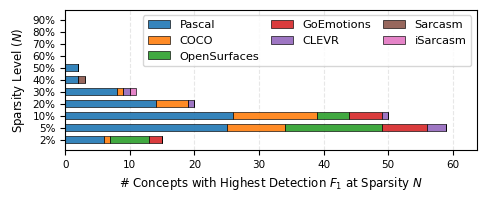

(<Figure size 550x200 with 1 Axes>,
 <Axes: xlabel='# Concepts with Highest Detection $F_{1}$ at Sparsity $N$', ylabel='Sparsity Level ($N$)'>)

In [18]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_percentile_histogram

plot_percentile_histogram(
      dataset_names=['Broden-Pascal', 'Coco', 'Broden-OpenSurfaces', 'GoEmotions', 'CLEVR', 'Sarcasm', 'iSarcasm'],        # Required: dataset name
      model_name='Llama',           # Required: model name ('CLIP', 'Llama', 'Gemma', etc.)
      concept_type='linsep',          # Required: concept type ('avg', 'linsep', 'kmeans', 'linsep kmeans', 'sae')
      sample_type='patch',         # Optional: 'patch' or 'cls' (default: 'patch')
      y_label="Sparsity Level ($N$)",
      x_label="# Concepts with Highest Detection $F_{1}$ at Sparsity $N$",
      percentthrumodel=100,  
      figsize=(5.5, 2),
      label_fontsize=8.5, 
      ticklabel_fontsize=7.5, 
      legend_fontsize=8.2,
      save_fig='../Figs/Paper_Figs/sparsity_summary_llama_linsep.pdf'             # Optional: whether to save the figure (default: True)
  )

Figure saved to ../Figs/Histograms/percentile_histogram_all_ptm_Broden-Pascal_Coco_Broden-OpenSurfaces_CLEVR_CLIP_avg_linsep_patch.png


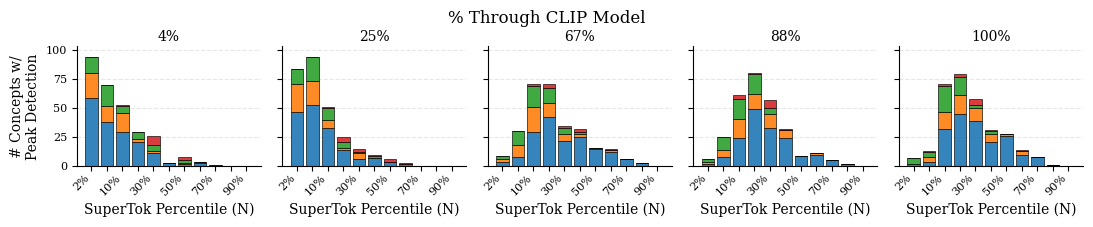

(<Figure size 1100x150 with 5 Axes>,
 array([<Axes: xlabel='SuperTok Percentile (N)', ylabel='# Concepts w/\nPeak Detection'>,
        <Axes: xlabel='SuperTok Percentile (N)'>,
        <Axes: xlabel='SuperTok Percentile (N)'>,
        <Axes: xlabel='SuperTok Percentile (N)'>,
        <Axes: xlabel='SuperTok Percentile (N)'>], dtype=object))

In [174]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_percentile_histogram_all_ptm

# Example usage
plot_percentile_histogram_all_ptm(
  dataset_names=['Broden-Pascal', 'Coco', 'Broden-OpenSurfaces', 'CLEVR'],
  model_name='CLIP',
  concept_types=['avg', 'linsep'],
  sample_type='patch',
  percentthrumodels=[4, 25, 67, 88, 100],
  figsize=(11, 1.5),
  label_fontsize=10,
  title_font_size=12,
  legend_size=12,
  font_size=8,
  show_legend=False,
)

## Both

Main figure saved to: ../Figs/Paper_Figs/GoEmotions_Llama_cls_patch_linsep_linsep kmeans_combined.pdf


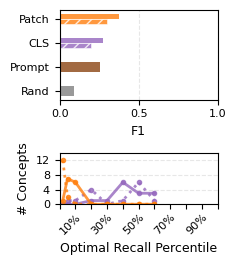

Legend size: 5.59 x 0.44 inches
Legend saved to: ../Figs/Paper_Figs/GoEmotions_Llama_cls_patch_linsep_linsep kmeans_legend.pdf


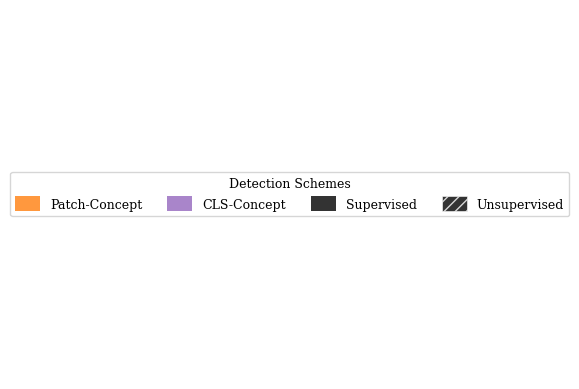

In [5]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_combined_f1_and_percentiles

# Create combined plot with separate legend
df, percentile_counts = I also (
  dataset_name='GoEmotions',
  model_names='Llama',
  concept_types=['linsep', 'linsep kmeans'],
  sample_types=['cls', 'patch'],
  figsize=(2.5, 1.75, 1),        # Main plot size
  show_baselines=True,
  flatten_legend=True
)

Saved combined multi-dataset plot to: ../Figs/Paper_Figs/Llama_Coco_Broden-OpenSurfaces_iSarcasm_GoEmotions_patch_cls_f1_detection_combined_multi.pdf


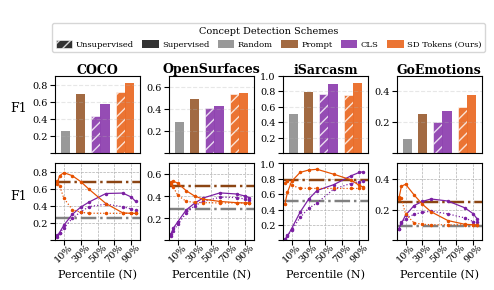

In [10]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_combined_f1_and_detection_multi

plot_combined_f1_and_detection_multi(
  dataset_names=['Coco', 'Broden-OpenSurfaces', 'iSarcasm', 'GoEmotions'],
  model_names=['Llama'],  # Must be a list
  split='test',
  sample_types=['patch', 'cls'],
  concept_types=['linsep', 'linsep kmeans'],
  baseline_types=['prompt', 'random'],
  percentthrumodel=100,
  show_baselines=True,  # Show baselines in F1 plot
  metric='f1',
  weighted_avg=True,
  ylims=[((0, 0.9),(0, 0.9)), ((0, 0.7),(0, 0.7)), ((0, 1),(0, 1)), ((0, 0.5),(0, 0.5))],
  x_positions = (0.12, 0.3, 0.59, 0.88),
  figsize=(5.5, 1.1, 1.1),  # (width, top_height, bottom_height)
  save_fig=True,
  save_dir='../Figs/Paper_Figs',
  label_font_size=9,
  legend_font=6,
  axes_font=7,
  hide_top_xticks=True,
  title="",  # No overall title
  xlabel='Percentile (N)'
)

## Just Sparsity Highlights

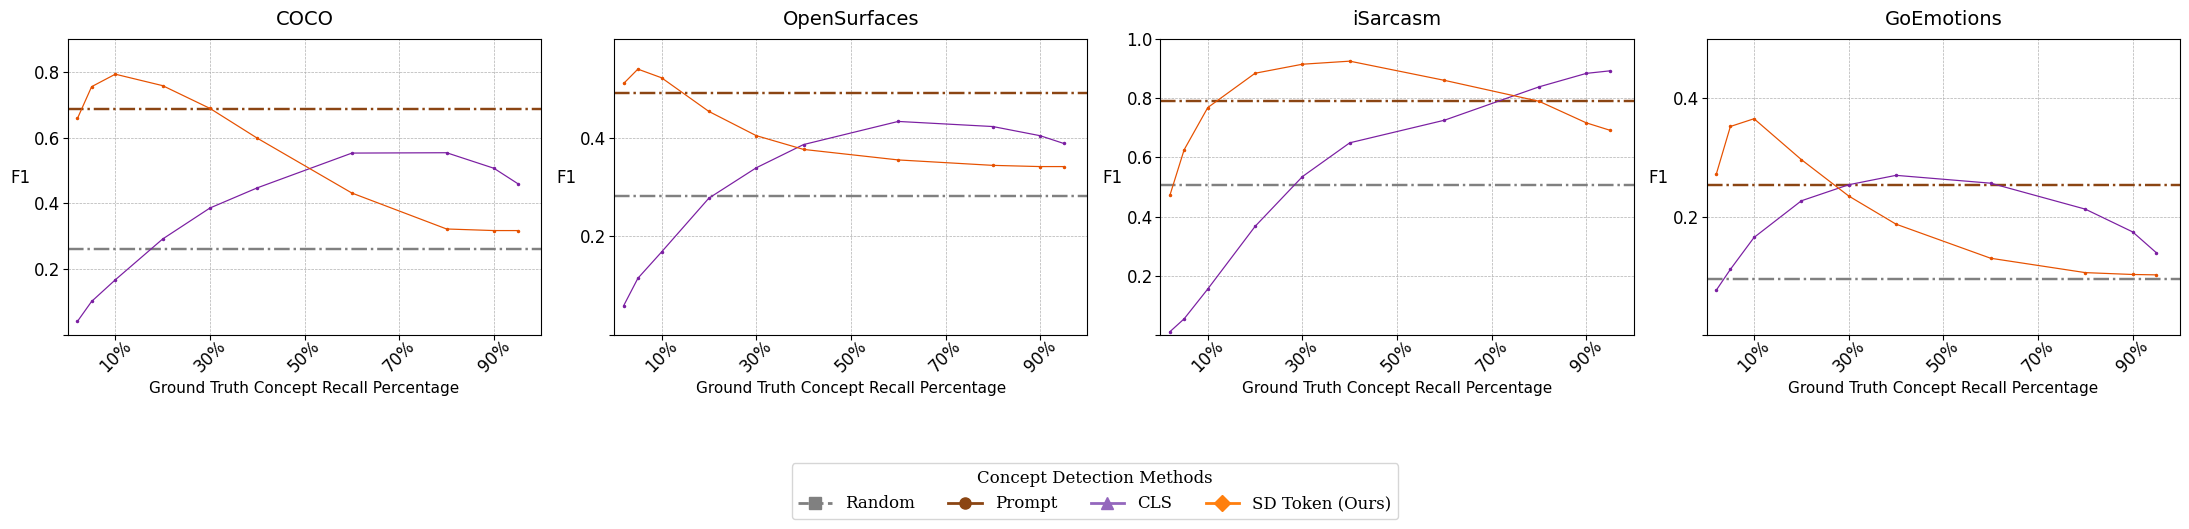

In [71]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_detection_scores_multi
plot_detection_scores_multi(dataset_names=['Coco', 'Broden-OpenSurfaces', 'iSarcasm', 'GoEmotions'],
                            model_names=['Llama'],
                            sample_types=['patch', 'cls'],
                            concept_types=['linsep'],
                            baseline_types=['random', 'prompt'],
                            percentthrumodel=100,
                            metric='f1',
                            weighted_avg=True,
                            figsize=(5.5, 4),
                            ylims=[(0, 0.9), (0, 0.6), (0, 1.0), (0, 0.5)],
                            save_fig=False,
                            save_dir='../Figs/Paper_Figs')

Figure saved to: ../Figs/Paper_Figs/CLEVR_Llama_patch_overlay_detection_scores.pdf


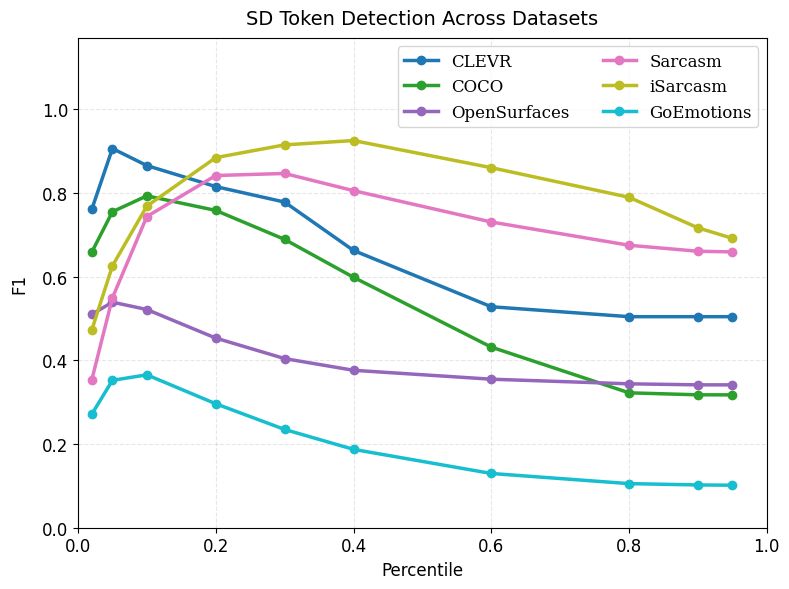

In [111]:
import utils.plot_utils
importlib.reload(utils.plot_utils)
from utils.plot_utils import plot_detection_scores_overlay

plot_detection_scores_overlay(
      dataset_names=['CLEVR', 'Coco', 'Broden-OpenSurfaces', 'Sarcasm', 'iSarcasm', 'GoEmotions'],
      model_name='Llama',
      concept_types=['linsep'],
      ylim=(0, 1.17),
      title='SD Token Detection Across Datasets'
)

# Inversions

## Plot of Best Detect/Invert Combos

In [84]:
# from utils.plot_utils import compare_best_schemes

# schemes = ['avg', 'linsep', 'unsupervised kmeans', 'unsupervised kmeans linsep']
# compare_best_schemes(metric_type='f1', 
#                      concept_schemes=schemes, 
#                      dataset_name='CLEVR', 
#                      model_name='CLIP', 
#                      superdetector_inversion=False,
#                      justobj=False, 
#                      xmin=0.0, 
#                      xmax=1.0)

KeyError: 'accuracy'

## Table of Best Detect/Invert Combos

In [55]:
from utils.plot_utils import summarize_best_inversion_metrics

concept_schemes = ['avg', 'linsep', 'unsupervised kmeans', 'unsupervised kmeans linsep', 'sae']
summarize_best_inversion_metrics(metric_type='f1', 
                                 concept_schemes=concept_schemes, 
                                 dataset_name='GoEmotions', 
                                 model_name='Gemma', 
                                 justobj=False, 
                                 superdetector_inversion=False)


,Scheme,Best Avg F1,Detect %,Invert %,File
0,avg concept cossim,0.1851,0.05,0.7,optimal_test_results_Gemma_avg_patch_embedding...
1,linsep concept cossim,0.2528,0.1,0.7,optimal_test_results_Gemma_linsep_patch_embedd...
2,unsupervised kmeans concept cossim,0.1499,0.02,0.6,optimal_test_results_Gemma_kmeans_1000_patch_e...
3,unsupervised kmeans linsep concept cossim,0.1380,0.02,0.7,optimal_test_results_Gemma_kmeans_1000_linsep_...
4,sae concept cossim,0.0625,0.7,0.95,optimal_test_results_Gemma_sae_patch_dense_f1.pt


In [41]:
from utils.plot_utils import summarize_all_inversion_methods
summarize_all_inversion_methods(
      metric_type='f1',
      concept_schemes=['linsep', 'unsupervised kmeans linsep', 'sae'],
      dataset_name='CLEVR',
      sample_types=['patch', 'cls'],
      model_names=['CLIP'],
      show_baseline=False,
      save_table=False
  )


=== CLEVR - All Inversion Methods Comparison (F1) ===


,Scheme,Best Avg F1,Detect %,Invert %,File,Model,Method
0,CLIP Regular linsep concept cossim,0.6530,0.3,0.8,optimal_test_results_CLIP_linsep_patch_embeddi...,CLIP,Regular
1,CLIP Regular unsupervised kmeans concept cossim,0.6330,0.2,0.8,optimal_test_results_CLIP_kmeans_1000_patch_em...,CLIP,Regular
2,CLIP Regular unsupervised kmeans linsep concep...,0.6009,0.2,0.8,optimal_test_results_CLIP_kmeans_1000_linsep_p...,CLIP,Regular
3,CLIP Regular sae concept cossim,0.5642,0.4,0.95,optimal_test_results_CLIP_sae_patch_dense_f1.pt,CLIP,Regular
5,CLIP Superdetector unsupervised kmeans superde...,0.6416,0.2,0.9,optimal_test_results_twostage_superpatch_CLIP_...,CLIP,Superdetector
7,CLIP Superdetector sae superdetector cossim,0.6199,0.4,0.95,optimal_test_results_twostage_superpatch_CLIP_...,CLIP,Superdetector
4,CLIP Superdetector linsep superdetector cossim,0.6137,0.2,0.9,optimal_test_results_twostage_superpatch_CLIP_...,CLIP,Superdetector
6,CLIP Superdetector unsupervised kmeans linsep ...,0.5909,0.2,0.9,optimal_test_results_twostage_superpatch_CLIP_...,CLIP,Superdetector
9,Inversion Baseline (always_positive),0.0388,N/A,N/A,inversion_always_positive_CLIP_patch_baseline.csv,N/A,Baseline
8,Inversion Baseline (random),0.0381,N/A,N/A,inversion_random_CLIP_patch_baseline.csv,N/A,Baseline



Table saved to: ../Inversion_Tables/CLEVR_all_inversion_methods_f1.csv


## Inversion Plots Per Concept

# Precision/Recall Curves

Added random baseline
Added always_positive baseline
Added always_negative baseline


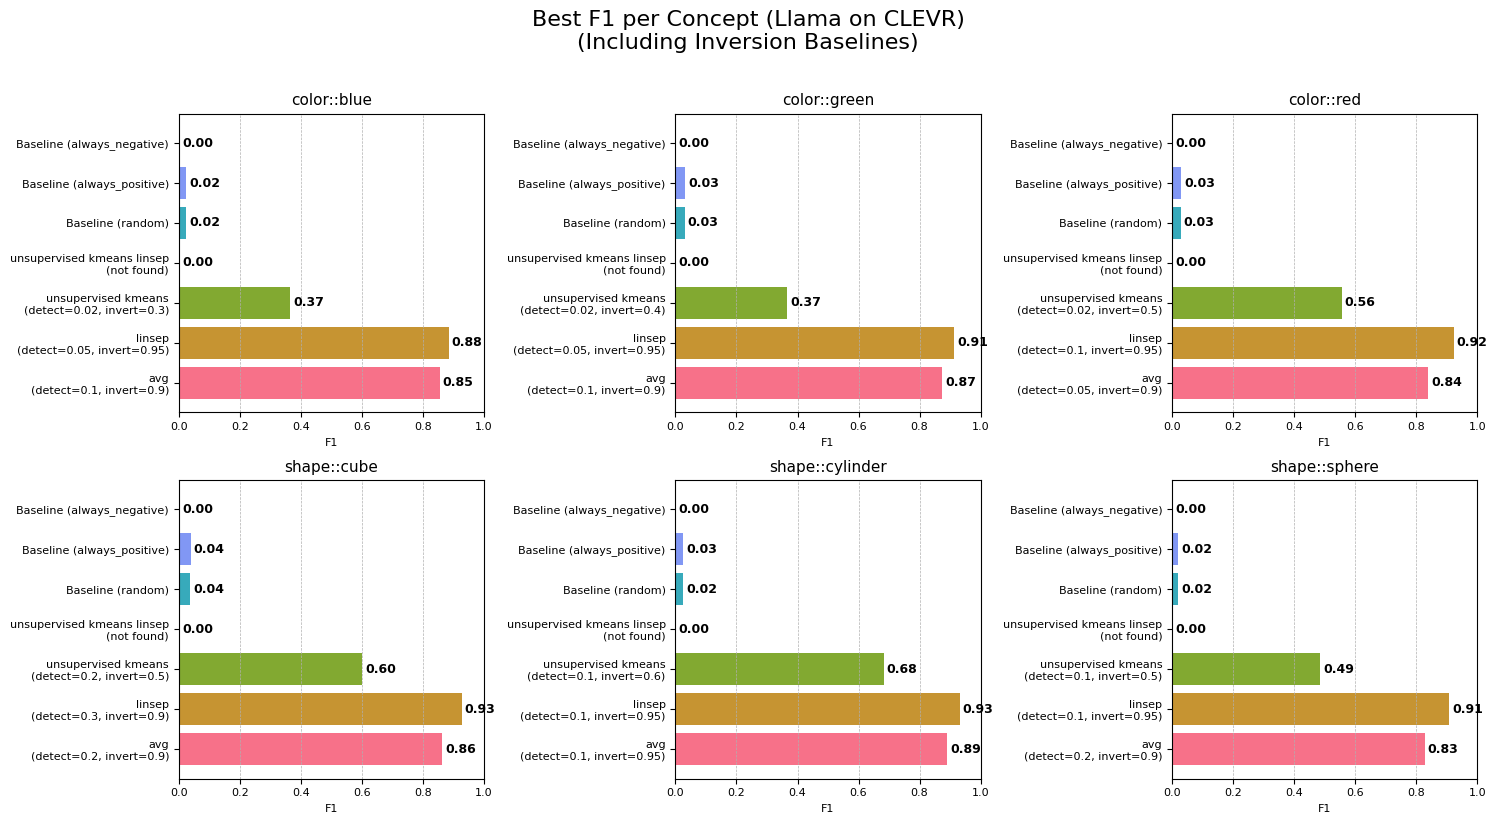

In [39]:
from utils.plot_utils import compare_best_schemes_per_concept
compare_best_schemes_per_concept(
    metric_type='f1',
    concept_schemes=['avg', 'linsep', 'unsupervised kmeans', 'unsupervised kmeans linsep'],
    dataset_name='CLEVR',
    model_name='Llama',
    justobj=False,
    superdetector_inversion=False,
    xmin=0.0,
    xmax=1.0
)

## For CLS token Level

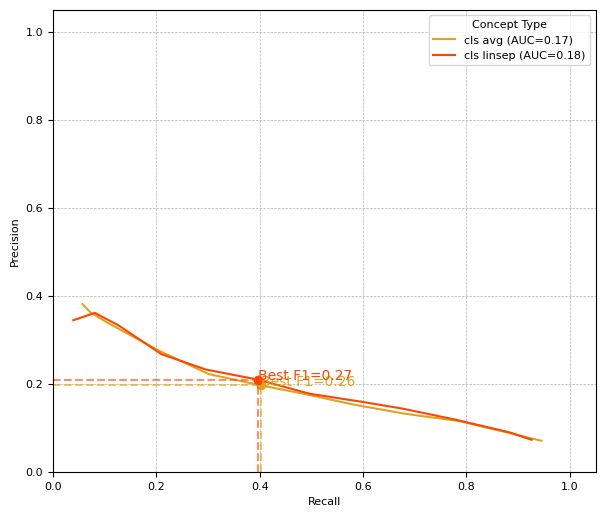

In [54]:
from utils.plot_utils import plot_pr_curves_across_methods
plot_pr_curves_across_methods(dataset_name='GoEmotions', 
                               split='test', 
                               model_name='Llama', 
                               sample_types=['cls'], 
                               save_path=None,
                              weighted=True)

## For Patch Level

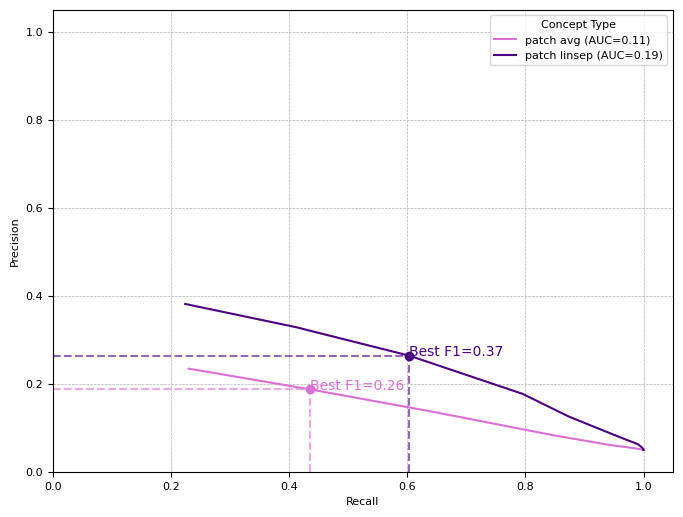

In [56]:
from utils.plot_utils import plot_pr_curves_patch_level
plot_pr_curves_patch_level(
    dataset_name='GoEmotions',
    split='test',
    model_name='Llama',
    concept_schemes=["avg","linsep"],
    percentiles=[0.02,0.05,0.1,0.2,0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,0.95, 0.95],
    justobj=False,
    weighted=True,
    save_path=None
)

# Hybrid Concept Analysis

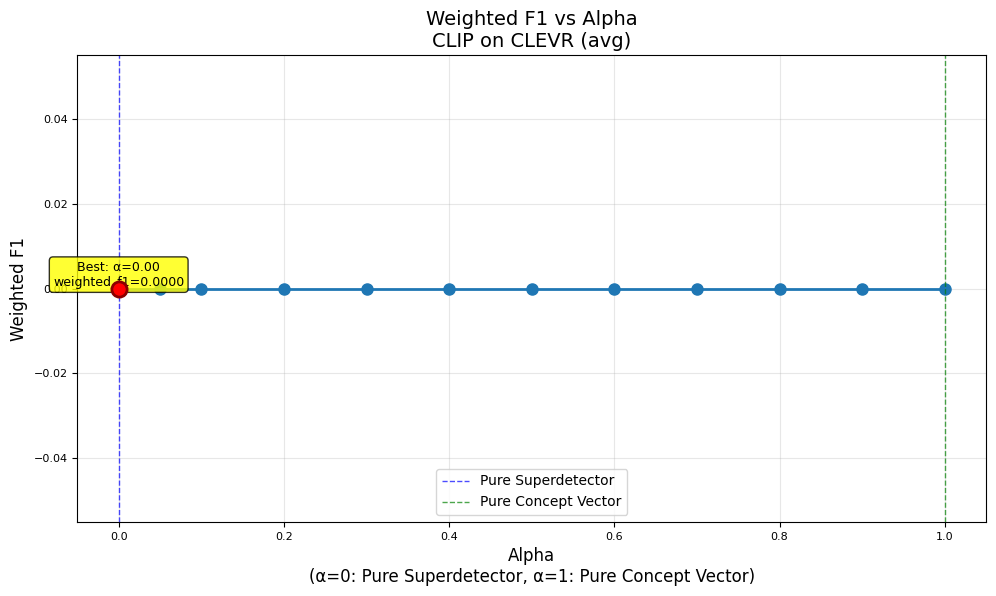

In [20]:
from utils.hybrid_concept_utils import plot_metric_over_alphas

# Just show the plot
plot_metric_over_alphas('CLEVR', 
                        'CLIP',
                        'avg', 
                        'weighted_f1')